In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
from numpy import array

In [163]:
df1=pd.read_excel('SAT_GPA.xls')

In [164]:
df1=df1[['univ_GPA','SAT']]

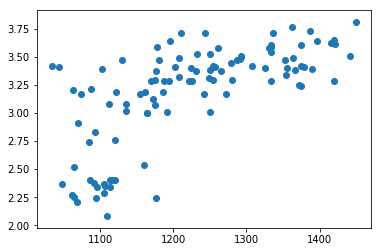

In [165]:
plt.scatter(df1['SAT'],df1['univ_GPA'])

In [166]:
df1

,univ_GPA,SAT
0,3.52,1232
1,2.91,1070
2,2.40,1086
3,3.47,1287
4,3.47,1130
5,2.37,1048
6,2.40,1121
7,2.24,1095
8,3.02,1135
9,3.32,1208


In [167]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=300, tol=0.0001).fit(df1)
classier=kmeans.labels_
classier

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int32)

In [168]:
kmeans.cluster_centers_

array([[   2.94915254, 1137.27118644],
       [   3.45978261, 1329.93478261]])

Text(0, 0.5, 'University GPA')

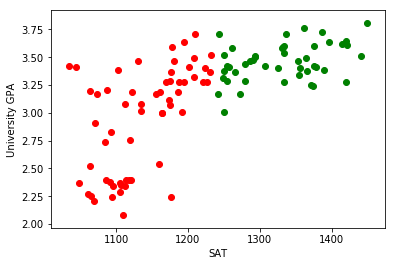

In [169]:
red=[]
green=[]
redy=[]
greeny=[]
redcount=0
greencount=0
for i in range(len(df1)):
    if classier[i]==0:
        plt.scatter(df1['SAT'][i],df1['univ_GPA'][i],color='red')
        red.append(df1['SAT'][i])
        redy.append(df1['univ_GPA'][i])
        redcount+=1
    else:
        plt.scatter(df1['SAT'][i],df1['univ_GPA'][i],color='green') 
        green.append(df1['SAT'][i])
        greeny.append(df1['univ_GPA'][i])
        greencount+=1
plt.xlabel('SAT')
plt.ylabel('University GPA')

In [170]:
sat1=np.arange(1034,1137.3,0.02)
sat2=np.arange(1089.95,1232,0.02)
sat3=np.arange(1242,1373.85,0.02)
sat4=np.arange(1329.9,1450,0.02)
gpa=np.arange(2,4,0.01)

In [171]:
#generate membership functions
sat1_lo=fuzz.trimf(sat1,[1034,1034,1090])
sat1_md=fuzz.trimf(sat1,[1034,1090,1137.3])
sat1_hi=fuzz.trimf(sat1,[1090,1137.3,1137.3])

sat2_lo=fuzz.trimf(sat2,[1089.95,1089.95,1137.30])
sat2_md=fuzz.trimf(sat2,[1089.95,1137.30,1232.00])
sat2_hi=fuzz.trimf(sat2,[1137.30,1232.00,1232.00])

sat3_lo=fuzz.trimf(sat3,[1242,1242,1329.9])
sat3_md=fuzz.trimf(sat3,[1242,1329.9,1373.85])
sat3_hi=fuzz.trimf(sat3,[1090,1137.3,1137.3])

sat4_lo=fuzz.trimf(sat4,[0,0,1329.9])
sat4_md=fuzz.trimf(sat4,[1329.9,1340.6,1450])
sat4_hi=fuzz.trimf(sat4,[1340.6,1450,1450])

gpa1_lo=fuzz.trimf(gpa,[2.08,2.08,2.74])
gpa1_md=fuzz.trimf(gpa,[2.08,2.74,2.95])
gpa1_hi=fuzz.trimf(gpa,[2.74,2.95,2.95])

gpa2_lo=fuzz.trimf(gpa,[2.57,2.57,2.95])
gpa2_md=fuzz.trimf(gpa,[2.57,2.95,3.71])
gpa2_hi=fuzz.trimf(gpa,[2.95,3.71,3.71])

gpa3_lo=fuzz.trimf(gpa,[3.01,3.01,3.35])
gpa3_md=fuzz.trimf(gpa,[3.01,3.35,3.46])
gpa3_hi=fuzz.trimf(gpa,[3.35,3.46,3.46])

gpa4_lo=fuzz.trimf(gpa,[3.285,3.285,3.46])
gpa4_md=fuzz.trimf(gpa,[3.285,3.46,3.81])
gpa4_hi=fuzz.trimf(gpa,[3.46,3.81,3.81])

In [172]:
# SAT1=np.concatenate((sat1,sat2))
# SAT1_lo=np.concatenate((sat1_lo,sat2_lo))
# SAT1_md=np.concatenate((sat1_md,sat2_md))
# SAT1_hi=np.concatenate((sat1_hi,sat2_hi))

In [173]:
# SAT2=np.concatenate((sat3,sat4))
# SAT2_lo=np.concatenate((sat3_lo,sat4_lo))
# SAT2_md=np.concatenate((sat3_md,sat4_md))
# SAT2_hi=np.concatenate((sat3_hi,sat4_hi))

In [174]:
#Rule application
sa1_lo=fuzz.interp_membership(sat3,sat3_lo,1364)
sa1_md=fuzz.interp_membership(sat3,sat3_md,1364)
sa1_hi=fuzz.interp_membership(sat3,sat3_hi,1364)

sa2_lo=fuzz.interp_membership(sat4,sat4_lo,1364)
sa2_md=fuzz.interp_membership(sat4,sat4_md,1364)
sa2_hi=fuzz.interp_membership(sat4,sat4_hi,1364)

In [175]:
rule1_lo=np.fmin(np.fmax(sa1_lo,sa2_lo),np.fmax(gpa3_lo,gpa4_lo))
rule1_md=np.fmin(np.fmax(sa1_md,sa2_md),np.fmax(gpa3_md,gpa4_md))
rule1_hi=np.fmin(np.fmax(sa1_hi,sa2_hi),np.fmax(gpa3_hi,gpa4_hi))

In [176]:
aggregated=np.fmax(rule1_lo,np.fmax(rule1_md,rule1_hi))

In [177]:
gp=fuzz.defuzz(gpa,aggregated,'centroid')
gpa=fuzz.interp_membership(gpa,aggregated,gp)

In [178]:
gp

3.416722832181515

#neural network

In [189]:
data=df1['SAT']
target=df1['univ_GPA']

In [190]:
test_x = data[81:]
test_y = target[81:]
train_x = data[:81]
train_y = target[:81]

In [237]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(1, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "linear"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "mean_squared_error"
)

results = model.fit(
 train_x, train_y,
 epochs= 2000,
 batch_size = 200,
 validation_data = (test_x, test_y)
)
a=model._make_predict_function()
#print("Test-Accuracy:", np.mean(results.history["val_acc"]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 50)                100       
_________________________________________________________________
dropout_27 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_28 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 51        
Total params: 5,251
Trainable params: 5,251
Non-trainable params: 0
_________________________________________________________________
Train on

In [238]:
Xnew = [[1232,1070,1086,1287,1130,1333,1364]]
ynew = model.predict(Xnew)
print(ynew)

[[2.63979  ]
 [2.299243 ]
 [2.332882 ]
 [2.7554088]
 [2.4253745]
 [2.8521085]
 [2.9172692]]


In [4]:
data=pd.read_csv('carnegie_mellon.csv',header=None)

In [5]:
gpa=data.iloc[:,0]
sat=data.iloc[:,1]
results=data.iloc[:,2]

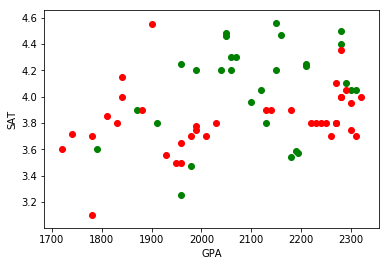

In [6]:
fig, ax = plt.subplots()
for i in range(len(gpa)):
    if results[i]==0:
        plt.scatter(sat[i],gpa[i],c='r')
    else:
        plt.scatter(sat[i],gpa[i],c='g')
ax.set_xlabel("GPA")
ax.set_ylabel("SAT")
plt.show()  

In [7]:
df=data.iloc[:,0:2]

In [8]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=500, tol=0.0001).fit(df)
classier=kmeans.labels_
classier

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1], dtype=int32)

In [9]:
kmeans.cluster_centers_

array([[   3.86625   , 1928.4375    ],
       [   3.98342857, 2230.71428571]])

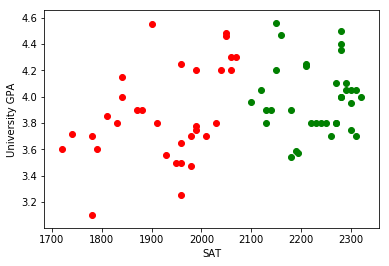

In [10]:
red=[]
green=[]
redy=[]
greeny=[]
redcount=0
greencount=0
for i in range(len(gpa)):
    if classier[i]==0:
        plt.scatter(sat[i],gpa[i],color='red')
        red.append(sat[i])
        redy.append(gpa[i])
        redcount+=1
    else:
        plt.scatter(sat[i],gpa[i],color='green') 
        green.append(sat[i])
        greeny.append(gpa[i])
        greencount+=1
plt.xlabel('SAT')
plt.ylabel('University GPA')
plt.show()

In [11]:
sat1=np.arange(1034,1137.3,0.02)
sat2=np.arange(1089.95,1232,0.02)
sat3=np.arange(1242,1373.85,0.02)
sat4=np.arange(1329.9,1450,0.02)
gpa=np.arange(2,4,0.01)

In [14]:
for i in range(len(data)):
    

67